In [74]:
import pickle
import math
import time
import matplotlib.pyplot as plt
import numpy as np 

time_stamp_d1 = time.strftime("%M,%S,")
import matplotlib.cm as cm
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib import animation
%matplotlib 
  
from matplotlib.pyplot import figure


'''
with open("D:\\RSF\\run26\\ReIm.csv","r") as data_file:
    content = data_file.readlines()
data_len = int(len(content)/2)

c = content[0].split()
cm = [0]*len(content)
for i, elem in enumerate(content):
    cm[i] = elem.split()
    for j in range(len(c)):
        cm[i][j] = float(cm[i][j])
        

cm[data_len*2-1]
cmm = [0]*data_len

for i in range(data_len):
    for j in range(len(cm[0])):
        cm[i][j] = 20*math.log10(math.sqrt((cm[i*2+1][j])**2 + (cm[i*2][j])**2))


#print(Timer(stmt=code2))
plt.pcolor(cm)
plt.show()
time_stamp_d2 = time.strftime("%M,%S")    

time_conc_d1 = time_stamp_d1 + time_stamp_d2
time_delta_d1 = time_conc_d1.split(",")
for i in range(4):
    time_delta_d1[i] = int(time_delta_d1[i])


delta_d1 = (time_delta_d1[2]-time_delta_d1[0],time_delta_d1[3]-time_delta_d1[1])
print("measure time: {} Minute {} seconds".format(delta_d1[0],delta_d1[1]))
'''
print("done!")

Using matplotlib backend: Qt5Agg
done!


In [ ]:
with open("D:\\RSF\\1810-021.2 .pkl","rb") as data_file:
    content = data_file.readlines(100000)
#print(pickle.loads(content[0]))
print(content[0])  

In [5]:
import time

t = time.localtime()
print('year - {} | month - {}'.format(t[0],t[1]))
#My-File--2009-12-31--23-59-59.txt
file_data_name = time.strftime("%Y-%m-%d--%H-%M-%S")
print("{}.csv".format(file_data_name))

time_stamp_1 = time.strftime("%M,%S,")

for i in range(200000000):
    i += 5
    
time_stamp_2 = time.strftime("%M,%S")
time_conc = time_stamp_1 + time_stamp_2
time_delta = time_conc.split(",")
for i in range(4):
    time_delta[i] = int(time_delta[i])

delta = (time_delta[2]-time_delta[0],time_delta[3]-time_delta[1])
print("measure time: {} Minute {} seconds".format(delta[0],delta[1]))

year - 2019 | month - 4
2019-04-09--15-25-59.csv
measure time: 1 Minute -43 seconds


done!


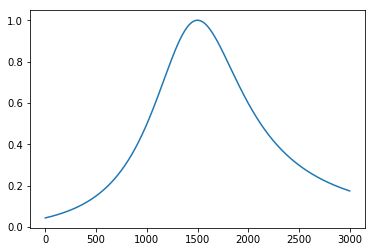

In [2]:
w0 = 2.5e+9

def impedance(w, L, C):
    p = math.sqrt(L/C)
    K = (1/(1+50*((w/w0 - w0/w)**2)/p))
    return(K)
data = []
for i in range(int(1e9),int(4e9), int(1e6)):
    data.append(impedance(i, 1e-7,1e-9))
    
plt.plot(data)
print("done!")

In [148]:
def impedance_loop(w0, ampl):
    L = 1e-3
    C = 1e-3
    p = math.sqrt(L/C)
    
    data = []
    for i in range(int(2e9),int(3.01e9), int(10e6)):
        data.append((ampl/(1+50*((i/w0 - w0/i)**2)/p)))
   
    return(data)
def Func2D(data_length):
    temp_2d_data = []
    for i in range(data_length):
        temp_2d_data.append(impedance_loop(2.5e9+i*1e6, i))
    return(np.transpose(temp_2d_data))


fig, ax = plt.subplots()
fig.set_size_inches(12, 8, forward=True)

x_axis = [0]*101
x_counts = [0]*101
for i in range(101):
    x_axis[i] = 2e9 + i*10e6
    x_counts[i] = i

cp = int(len(x_axis)/2)
step = int(len(x_axis)/5)

plot_f_space = [cp-2*step, cp-step, cp, cp+step, cp+2*step]
plot_f_ticks = [x_axis[cp-2*step]/1e9,x_axis[cp-step]/1e9, x_axis[cp]/1e9, x_axis[cp+step]/1e9, x_axis[cp+2*step]/1e9]



#plot_I_space = 
#plot_I_ticks = 

locs, labels = plt.xticks()
plt.yticks(plot_f_space, plot_f_ticks)
D2Data = Func2D(201)
plt.title("Two Tone")
plt.ylabel("Frequency, GHz")
plt.xlabel("Current, mA")
plt.imshow(D2Data,  aspect='auto', cmap=cm.seismic, origin = 'lower')
plt.grid()
plt.colorbar()


In [173]:
x = np.arange(100)
y = np.arange(100)
temp = [[0]*len(x)]*len(y)
nrows, ncols = 100, 100
#grid = temp #.reshape((nrows, ncols))

#for i in range(len(x)):
#    temp[i] = np.random.rand(100)
fig = plt.figure()
#plt.imshow(grid, extent=(x.min(), x.max(), y.max(), y.min()),
#           interpolation='nearest', aspect='equal', cmap=cm.jet)

plt.ion()
x_upd = []
y_upd = np.array([])
z_upd = []


vmin_ = 0
vmax_ = 0
for i in range(10):    
    time.sleep(1)
    #z_upd.append([1,2,3,4])
    #z_upd.append(np.random.rand(10))
    temp_array = np.array(impedance_loop(2.5e9+i*10e6, i))
    
    temp_vmin = np.min(temp_array)
    temp_vmax = np.max(temp_array)
    if(temp_vmax > vmax_):
        vmax_ = temp_vmax
    if(temp_vmin < vmin_):
        vmin_ = temp_vmin
    
    z_upd.append(temp_array)
    plt.imshow(np.transpose(z_upd),interpolation='nearest', aspect='auto', cmap=cm.seismic, origin = 'lower')
    if i == 0:
        cb = plt.colorbar()   
    
    cb.set_clim(vmin = vmin_, vmax = vmax_)
    cb.draw_all()
    fig.canvas.draw()
    fig.canvas.flush_events()    


In [169]:
import pickle


In [168]:
f = open("data_format.txt", "x")
f.write("test data, 10.04.19")
f.write(z_upd)
f.close()

In [174]:
with open('data.pickle', 'wb') as f:
    pickle.dump(z_upd, f)

In [176]:
with open('data.pickle', 'rb') as f:
    data_new = pickle.load(f)

plt.imshow(np.transpose(data_new), interpolation='nearest', aspect='auto', cmap=cm.seismic, origin = 'lower')

In [128]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.backends.backend_pdf import PdfPages
%matplotlib 

fig = plt.figure()
im = plt.imshow(D2Data[y], animated=True)

def updatefig(*args):
    global y
    y += 1
    im.set_array(D2Data[y])
    return im,

ani = animation.FuncAnimation(fig, updatefig, interval=50, blit=True)
plt.show()

Using matplotlib backend: Qt5Agg


TypeError: Invalid dimensions for image data

In [177]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.backends.backend_pdf import PdfPages
%matplotlib 

fig = plt.figure()

def f(x, y):
    return D2Data[0:int(x)][0:int(y)]  #np.sin(x) + np.cos(y)

x = np.linspace(0, 3000, 1)
y = np.linspace(0, 1000, 1)

im = plt.imshow(f(x, y), animated=True)

def updatefig(*args):
    global x, y
    x += 1
    y += 1
    im.set_array(f(x, y))
    return im,

ani = animation.FuncAnimation(fig, updatefig, interval=50, blit=True)
plt.show()

Using matplotlib backend: Qt5Agg


TypeError: Invalid dimensions for image data

In [ ]:
fig = plt.figure()

ims = []
for i in range(len(D2Data)):
    im = plt.imshow(D2Data,  aspect='auto', cmap=cm.RdBu, origin = 'lower')
    ims.append
ani = animation.ArtistAnimation(fig, ims, interval = 50, blit = True, repeated_delay = 10000)

plt.show()


In [146]:
x = np.linspace(0, 1, 3000)
x

array([0.00000000e+00, 3.33444481e-04, 6.66888963e-04, ...,
       9.99333111e-01, 9.99666556e-01, 1.00000000e+00])

In [130]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.backends.backend_pdf import PdfPages
%matplotlib 

fig = plt.figure()

def f(x, y):
    return np.sin(x) + np.cos(y)

x = np.linspace(0, 2 * np.pi, 120)
y = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)

im = plt.imshow(f(x, y), animated=True)

def updatefig(*args):
    global x, y
    x += np.pi / 15.
    y += np.pi / 20.
    im.set_array(f(x, y))
    return im,

ani = animation.FuncAnimation(fig, updatefig, interval=50, blit=True)
plt.show()

Using matplotlib backend: Qt5Agg


In [105]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
xdata, ydata = [], []
ln, = plt.plot([], [], 'ro')

def init():
    ax.set_xlim(0, 2*np.pi)
    ax.set_ylim(-1, 1)
    return ln,

def update(frame):
    xdata.append(frame)
    ydata.append(np.sin(frame))
    ln.set_data(xdata, ydata)
    return ln,

ani = FuncAnimation(fig, update, frames=np.linspace(0, 2*np.pi, 128),
                    init_func=init, blit=True)
plt.show()
